<a href="https://colab.research.google.com/github/barbarosugurkan/kahvelab-beam-analysis/blob/main/2025-05-15/2025-05-15_adc_hist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Boş bir liste oluşturuyoruz, buraya integer değerleri ekleyeceğiz
liste = []

# Dosyayı okuma modunda açıyoruz ('with' kullanarak otomatik kapanmasını sağlıyoruz)
with open('SEMtest0.0.txt', 'r') as dosya:
    # İlk iki satırı atlıyoruz
    dosya.readline()  # 1. satır
    dosya.readline()  # 2. satır

    # Dosyanın kalan satırlarını satır satır okuyup işliyoruz
    for satir in dosya:  # Dosyadan okunan satırların listesi
        if len(satir) >= 17:  # Satırın uzunluğu kontrol ediliyor
            uc_karakter = satir[15:17]  # 13. 14. 15. karakterler (0'dan başlıyor)
            # Sadece sayısal karakterleri al ve birleştir
            sayisal_karakterler = ''.join([c for c in uc_karakter if c.isdigit()])
            if sayisal_karakterler:  # Eğer sayısal karakter varsa
                try:
                    sayi = int(sayisal_karakterler)
                    liste.append(sayi)  # Sayıyı listeye ekle
                except ValueError:
                    print(f"Satırda sayıya çevrilemez karakter var: {satir}")
            else:
                print(f"Satırda sayısal karakter yok: {satir}")
print(liste)


Satırda sayısal karakter yok: ADC : channel #   0 reading =    9.390 +-   27.029 from 11 non-zero readings 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 77, 0, 79, 95, 0, 82, 0, 0, 89, 0, 0, 0, 0, 0, 0, 0, 0, 88, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 75, 0, 0, 0, 0, 0, 79, 0, 0, 0, 0, 75, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80, 0, 0, 0, 0]


# Yeni Bölüm

In [ ]:
liste = []
with open('SEMtest0.0.txt', 'r') as dosya:
    lines = dosya.readlines()[2:-1]
for satir in lines:
    if len(satir) >= 17:
        uc_karakter = satir[14:17]
        sayi_str = ''.join([c for c in uc_karakter if c.isdigit()])
        if sayi_str:
            sayi = int(sayi_str)
            liste.append(sayi)
        else:
            print(f"Satırda sayısal karakter yok: {satir}")
print(liste)



[13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 77, 0, 79, 95, 0, 82, 0, 0, 89, 0, 0, 0, 0, 0, 0, 0, 0, 88, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 120, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 75, 0, 0, 0, 0, 0, 79, 0, 0, 0, 0, 75, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80, 0, 0, 0, 0]


9.117619047619048
26.489871812010826


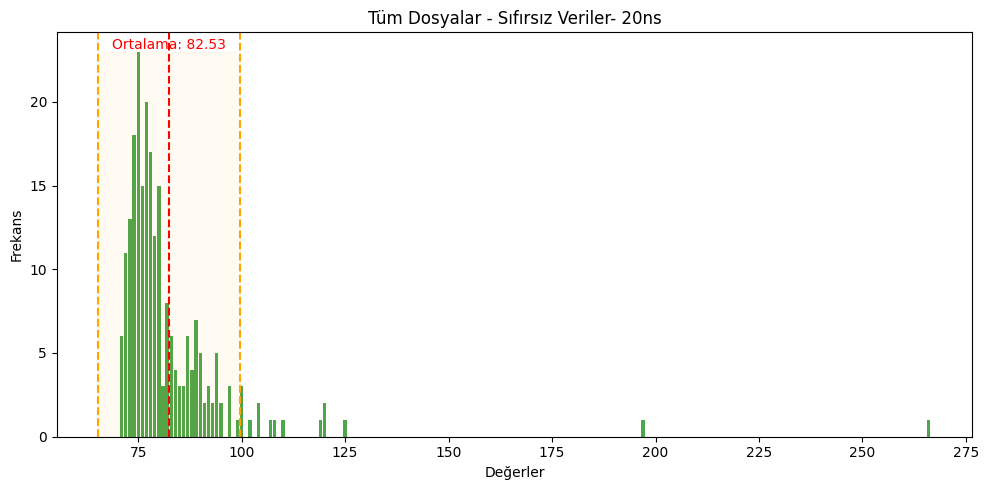

In [ ]:
import math
import matplotlib.pyplot as plt
from collections import Counter

butun_liste = []
sifirli_butun_liste = []

# Ortalama hesaplama fonksiyonu
def calculate_mean(numbers):
    return sum(numbers) / len(numbers)

# Standart sapma hesaplama fonksiyonu
def calculate_standard_deviation(numbers):
    mean = calculate_mean(numbers)
    variance = sum((x - mean) ** 2 for x in numbers) / len(numbers)
    return math.sqrt(variance)

for i in range(21):
    if i<10:
        dosyapath = 'SEMtest0.' + str(i) +  '.txt'
    elif 20>i>=10:
        dosyapath = 'SEMtest1.' + str(i-10) + '.txt'
    elif i>=20:
        dosyapath = 'SEMtest2.' + str(i - 20) + '.txt'
    liste = []
    sifirsiz_liste = []
    with open(dosyapath, 'r') as dosya:
        lines = dosya.readlines()[2:-1]
    for satir in lines:
        if len(satir) >= 17:
            uc_karakter = satir[14:17]
            sayi_str = ''.join([c for c in uc_karakter if c.isdigit()])
            if sayi_str:
                sayi = int(sayi_str)
                liste.append(sayi)
            else:
                print(f"Satırda sayısal karakter yok: {satir}")

    # print(liste)

    for i in liste:
        sifirli_butun_liste.append(i)
        if i != 0:
            sifirsiz_liste.append(i)
    for i in sifirsiz_liste:
        butun_liste.append(i)

    """print(f"Ortalama: {calculate_mean(liste)}")
    print(f"sifirsiz Ortalama: {calculate_mean(sifirsiz_liste)}")

    print(f"Standart Sapma: {calculate_standard_deviation(liste)}")
    print(f"sifirsiz Standart Sapma: {calculate_standard_deviation(sifirsiz_liste)}")"""

"""    # Histogram grafiğini oluşturma
plt.figure(figsize=(10, 5))

    # Tüm veriler için histogram
plt.subplot(1, 2, 1)
plt.hist(butun_liste, bins=10, color='blue', alpha=0.7)
plt.title(f'{dosyapath} - Tüm Veriler')
plt.xlabel('Değerler')
plt.ylabel('Frekans')

plt.tight_layout()
plt.show()"""

butun_liste_mean = calculate_mean(butun_liste)
butun_liste_std = calculate_standard_deviation(butun_liste)
butun_liste_mean_plus_std = butun_liste_mean + butun_liste_std
butun_liste_mean_minus_std = butun_liste_mean - butun_liste_std

"""print(calculate_mean(sifirli_butun_liste))
print(calculate_standard_deviation(sifirli_butun_liste))"""



plt.figure(figsize=(10, 5))
frekanslar_butun = Counter(butun_liste)
x_butun = list(frekanslar_butun.keys())
y_butun = list(frekanslar_butun.values())
plt.bar(x_butun, y_butun, color='green', alpha=0.7)

plt.axvline(butun_liste_mean, color='red', linestyle='--', label=f'Ortalama: {butun_liste_mean:.2f}')
plt.axvline(butun_liste_mean_plus_std, color='orange', linestyle='--', label=f'Ortalama + 1 Std: {butun_liste_mean_plus_std:.2f}')
plt.axvline(butun_liste_mean_minus_std, color='orange', linestyle='--', label=f'Ortalama - 1 Std: {butun_liste_mean_minus_std:.2f}')

plt.fill_betweenx([0, max(y_butun)], butun_liste_mean_minus_std, butun_liste_mean_plus_std, color='orange', alpha=0.05, label='±1 Std Bölgesi')
plt.text(butun_liste_mean, max(y_butun), f'Ortalama: {butun_liste_mean:.2f}', ha='center', va='bottom', color='red')

plt.title('Tüm Dosyalar - Sıfırsız Veriler- 20ns')
plt.xlabel('Değerler')
plt.ylabel('Frekans')
plt.tight_layout()
plt.show()



[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 77, 0, 79, 95, 0, 82, 0, 0, 89, 0, 0, 0, 0, 0, 0, 0, 0, 88, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 120, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 75, 0, 0, 0, 0, 0, 79, 0, 0, 0, 0, 75, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80, 0, 0, 0, 0]
Ortalama: 9.39
sifirsiz Ortalama: 85.36363636363636
Standart Sapma: 27.029204575791734
sifirsiz Standart Sapma: 12.499256176216154


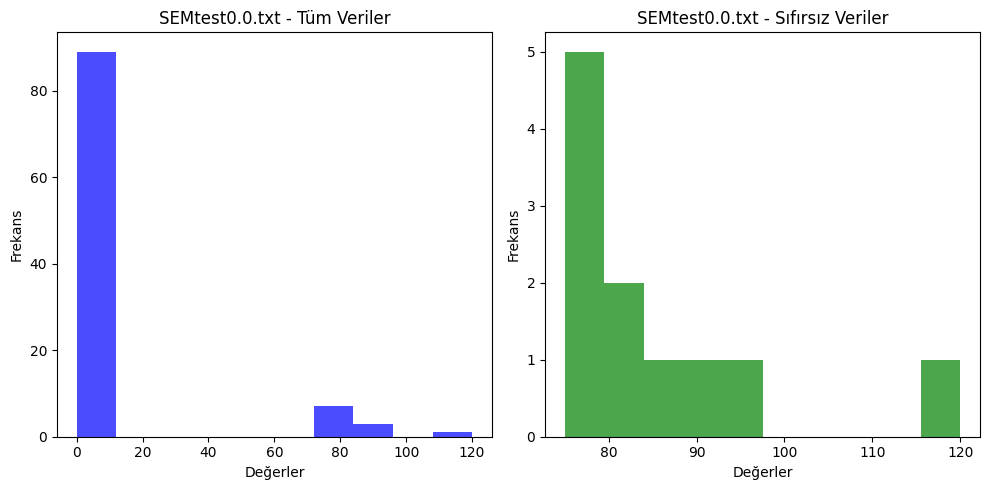

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 90, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 75, 0, 0, 0, 0, 78, 0, 0, 0, 77, 0, 0, 86, 0, 0, 0, 0, 0, 0, 0, 0, 74, 0, 0, 0, 0, 197, 0, 0, 80, 0, 0, 0, 0, 0, 0, 0, 0, 0, 78, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 74, 0, 0, 0, 0, 0, 0, 89, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Ortalama: 9.98
sifirsiz Ortalama: 90.72727272727273
Standart Sapma: 30.55158915670342
sifirsiz Standart Sapma: 34.051006951045736


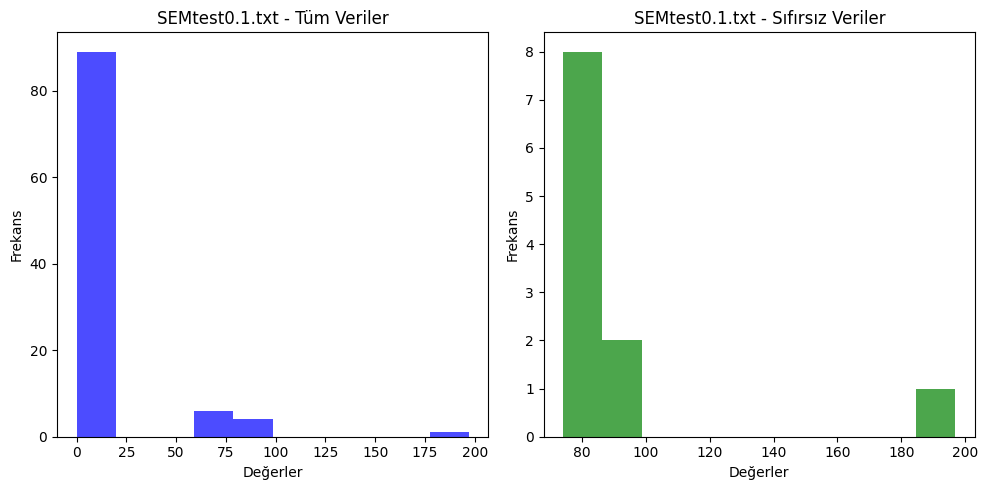

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 84, 75, 0, 0, 0, 79, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 90, 0, 0, 0, 0, 0, 0, 0, 0, 72, 0, 73, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 82, 0, 0, 0, 89, 0]
Ortalama: 6.44
sifirsiz Ortalama: 80.5
Standart Sapma: 21.916350061084515
sifirsiz Standart Sapma: 6.5


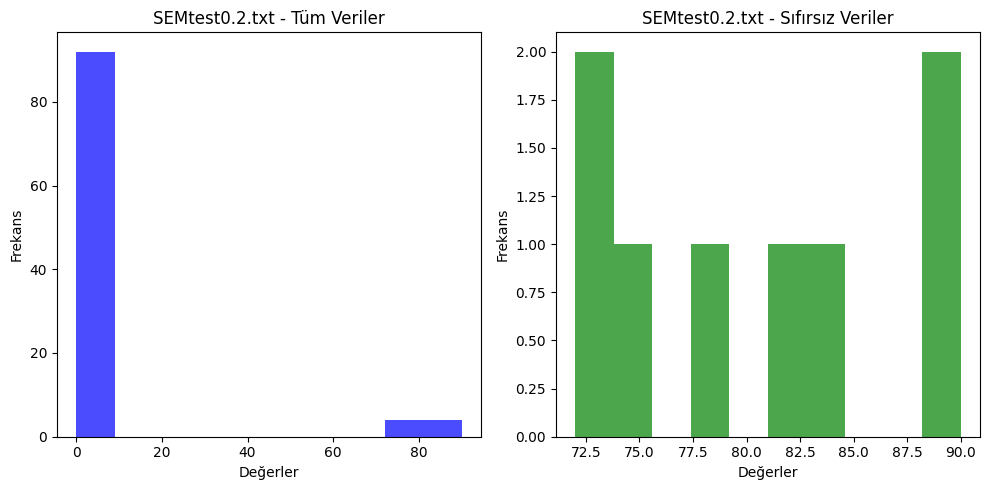

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 93, 0, 0, 0, 120, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 87, 0, 0, 0, 75, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 77, 87, 0, 0, 0, 0, 75, 0, 0, 0, 74, 0, 0, 0, 0, 0, 89, 0, 0, 80, 0, 0, 76, 0, 86, 0]
Ortalama: 10.19
sifirsiz Ortalama: 84.91666666666667
Standart Sapma: 27.919776145234408
sifirsiz Standart Sapma: 12.26416414690468


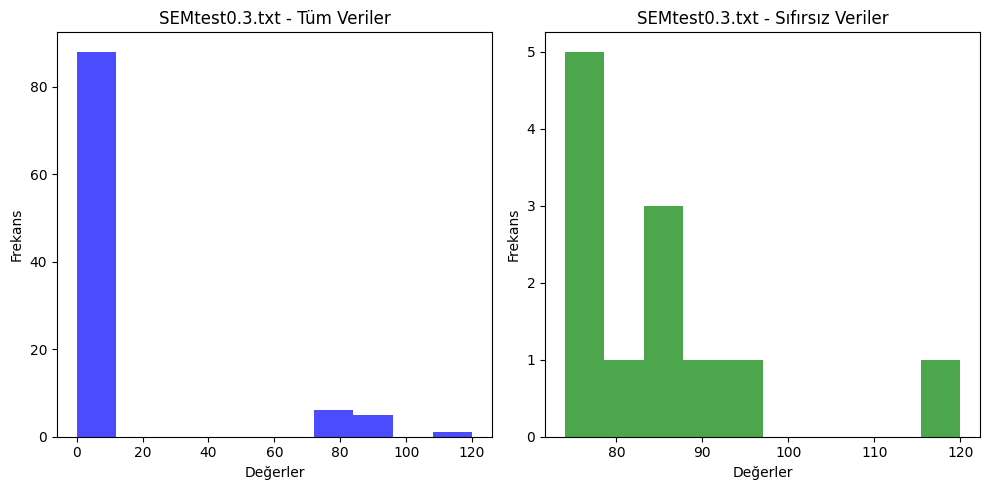

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 76, 0, 0, 0, 0, 0, 0, 0, 95, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 75, 0, 0, 0, 0, 0, 104, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 79, 0, 0, 0, 0, 0, 0, 0, 0, 0, 81, 0, 0, 0, 0, 0, 0, 0, 77, 0, 0, 0, 0, 73, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 78, 0, 0, 0, 0]
Ortalama: 7.38
sifirsiz Ortalama: 82.0
Standart Sapma: 23.651545404053394
sifirsiz Standart Sapma: 9.83192080250175


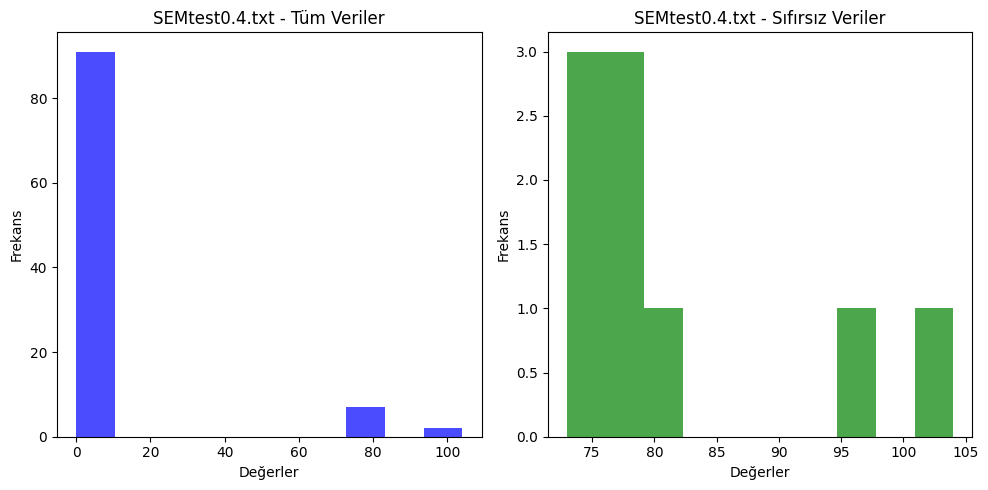

[0, 78, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 75, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 85, 78, 0, 75, 94, 0, 0, 0, 0, 0, 0, 75, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 75, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 74, 0, 0, 0, 0, 0, 76, 0, 0, 0, 0, 78, 0, 0, 0, 0, 0, 0, 0, 0, 74, 0, 0]
Ortalama: 9.37
sifirsiz Ortalama: 78.08333333333333
Standart Sapma: 25.448243554320214
sifirsiz Standart Sapma: 5.6044377257867914


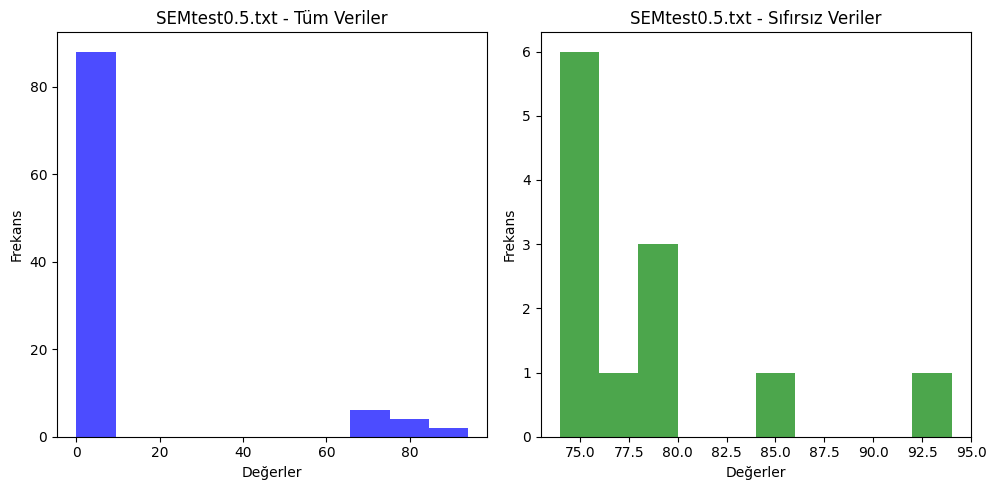

[0, 0, 73, 0, 0, 0, 0, 0, 0, 0, 75, 0, 0, 80, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 87, 0, 0, 78, 73, 78, 0, 0, 0, 0, 0, 0, 0, 0, 0, 74, 0, 77, 0, 0, 0, 0, 77, 80, 0, 0, 0, 77, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80, 0, 0, 0, 0, 0, 0, 78, 0, 0, 0, 72, 0, 0, 0, 0, 0, 0, 0, 0, 86, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Ortalama: 12.45
sifirsiz Ortalama: 77.8125
Standart Sapma: 28.57389542922003
sifirsiz Standart Sapma: 4.111246009423421


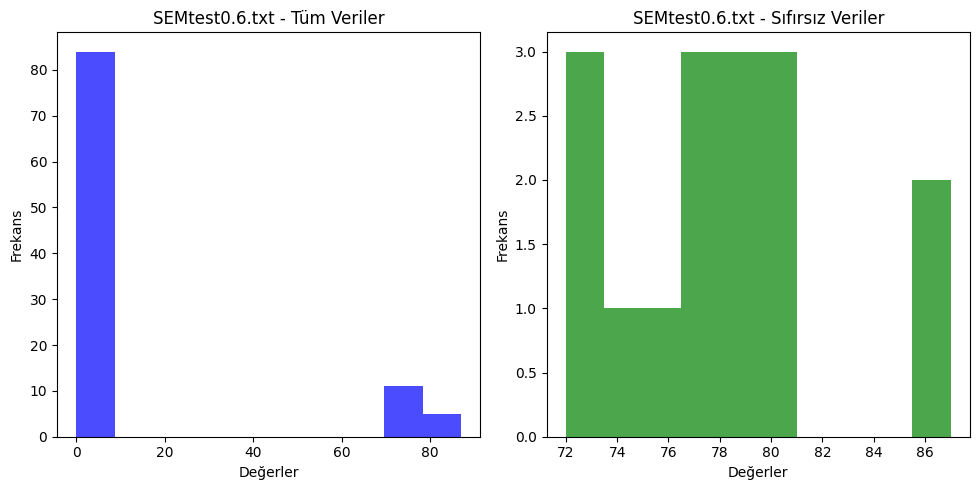

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 72, 74, 0, 0, 0, 0, 0, 0, 0, 81, 0, 0, 0, 0, 0, 75, 0, 0, 94, 0, 0, 0, 0, 0, 0, 94, 0, 0, 0, 0, 0, 0, 0, 0, 0, 71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 74, 0, 0, 0, 0, 0, 83, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 89, 0, 0, 0, 0, 78, 0, 0, 0, 0, 0, 0]
Ortalama: 9.85
sifirsiz Ortalama: 82.08333333333333
Standart Sapma: 26.875034883698294
sifirsiz Standart Sapma: 9.473281139898443


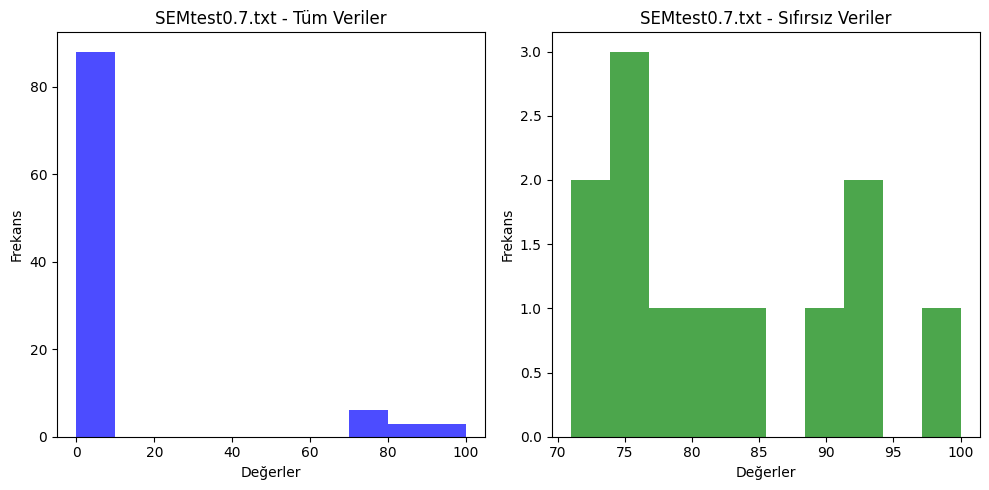

[0, 0, 0, 0, 0, 0, 77, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 76, 0, 0, 0, 0, 0, 0, 266, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 75, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 72, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 77, 0, 0, 0, 82, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Ortalama: 7.25
sifirsiz Ortalama: 103.57142857142857
Standart Sapma: 31.72802389056085
sifirsiz Standart Sapma: 66.36879030486101


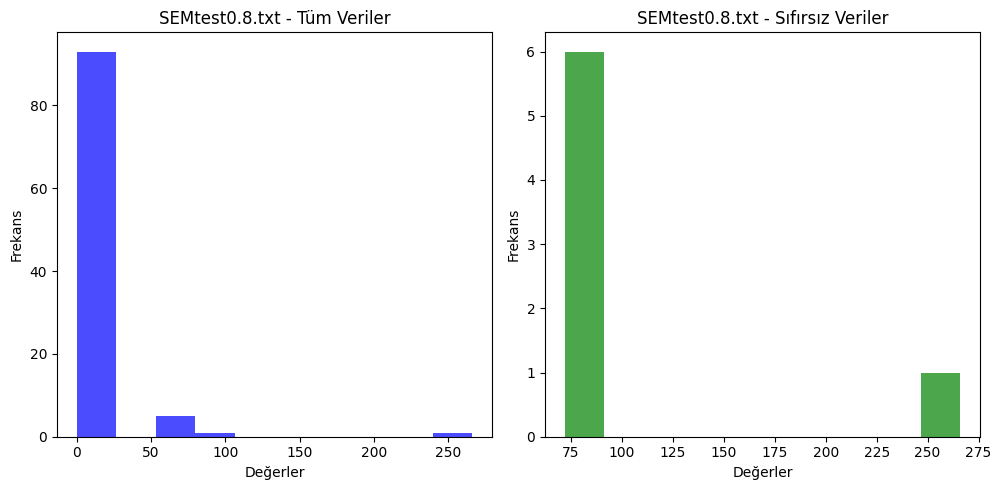

[0, 0, 0, 0, 107, 0, 0, 73, 0, 0, 0, 0, 0, 0, 79, 0, 78, 0, 0, 0, 0, 0, 0, 0, 74, 75, 0, 0, 0, 0, 0, 0, 0, 0, 88, 0, 0, 0, 0, 0, 92, 0, 0, 0, 80, 0, 0, 0, 0, 77, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 79, 0, 0, 0, 0, 76, 0, 0, 0, 82, 0, 0, 0, 0, 0, 0, 0, 0, 97, 0, 73, 0, 0, 0, 0, 0, 0, 0, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 73]
Ortalama: 14.05
sifirsiz Ortalama: 82.6470588235294
Standart Sapma: 31.33891351020322
sifirsiz Standart Sapma: 10.386309860867408


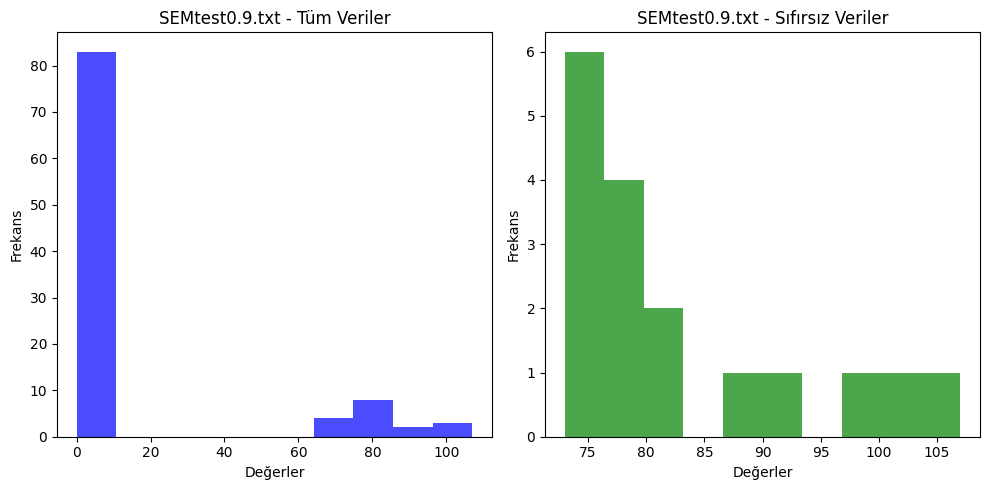

[0, 0, 80, 0, 75, 0, 0, 0, 74, 0, 0, 0, 0, 0, 0, 78, 73, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 79, 92, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 78, 72, 0, 0, 0, 0, 0, 0, 82, 0, 0, 0, 0, 0, 0, 75, 89, 87, 0, 75, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 74, 90, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 72, 71]
Ortalama: 15.16
sifirsiz Ortalama: 79.78947368421052
Standart Sapma: 31.491179717501822
sifirsiz Standart Sapma: 7.917860871196415


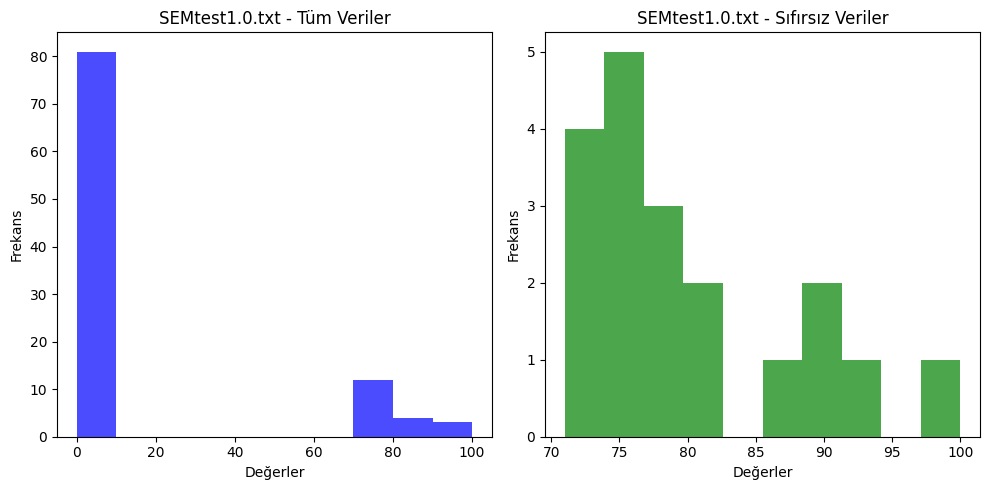

[0, 74, 0, 0, 0, 0, 0, 0, 71, 0, 83, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 94, 76, 0, 0, 0, 0, 0, 0, 0, 73, 0, 93, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80, 0, 0, 0, 0, 0, 71, 0, 0, 0, 0, 0, 0, 94, 0, 0, 0, 0]
Ortalama: 8.09
sifirsiz Ortalama: 80.9
Standart Sapma: 24.439351464390388
sifirsiz Standart Sapma: 9.082400563727631


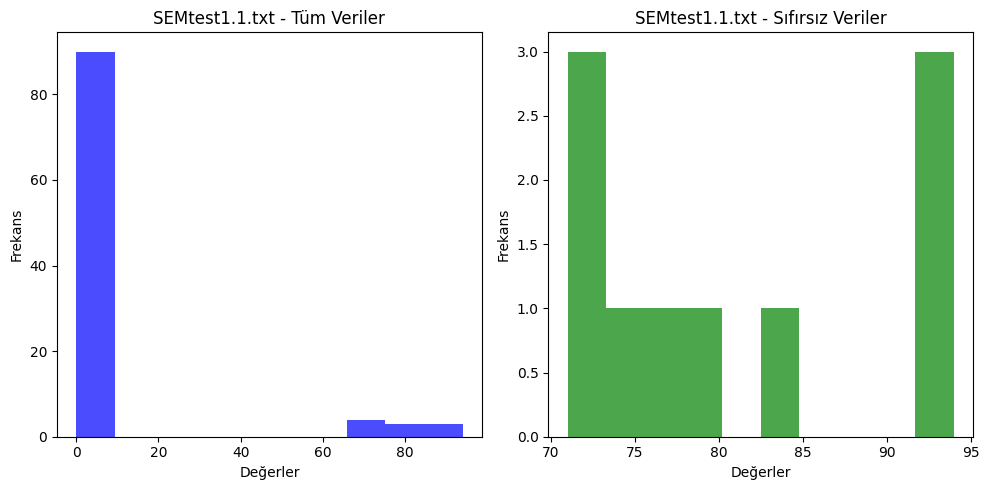

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 74, 0, 0, 73, 0, 79, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 71, 0, 72, 87, 76, 0, 0, 84, 0, 0, 0, 85, 0, 0, 0, 74, 0, 83, 0, 0, 0, 0, 104, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Ortalama: 9.62
sifirsiz Ortalama: 80.16666666666667
Standart Sapma: 26.234244795686408
sifirsiz Standart Sapma: 8.933395522171597


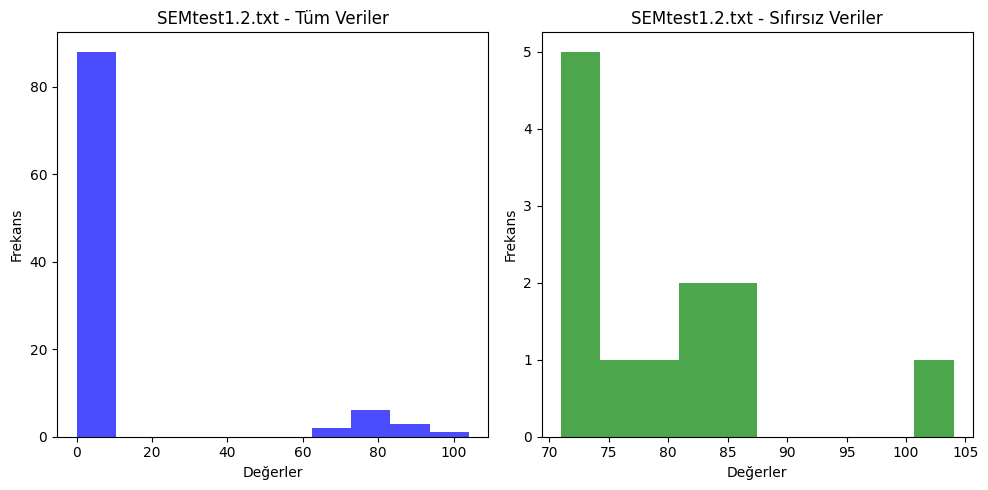

[0, 85, 0, 0, 0, 82, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 75, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 76, 0, 0, 0, 0, 72, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 108, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 89, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 79, 0, 0, 77, 0, 0, 0, 0, 0, 0, 0, 0, 76, 0, 0, 0, 0, 0, 0, 0, 0]
Ortalama: 8.19
sifirsiz Ortalama: 81.9
Standart Sapma: 24.770423896251735
sifirsiz Standart Sapma: 9.9443451267542


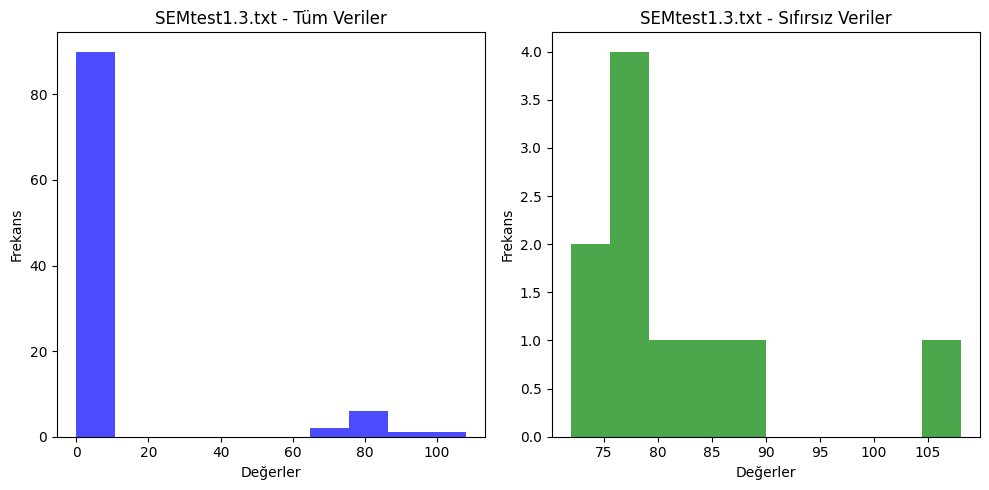

[0, 0, 0, 0, 0, 0, 0, 80, 0, 0, 0, 0, 0, 0, 78, 97, 0, 81, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 78, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 77, 83, 0, 0, 0, 0, 72, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 75, 0, 77, 0, 0, 0, 0, 76, 0, 0, 0, 88, 0, 0, 0, 0]
Ortalama: 9.62
sifirsiz Ortalama: 80.16666666666667
Standart Sapma: 26.145661207932744
sifirsiz Standart Sapma: 6.413960468297953


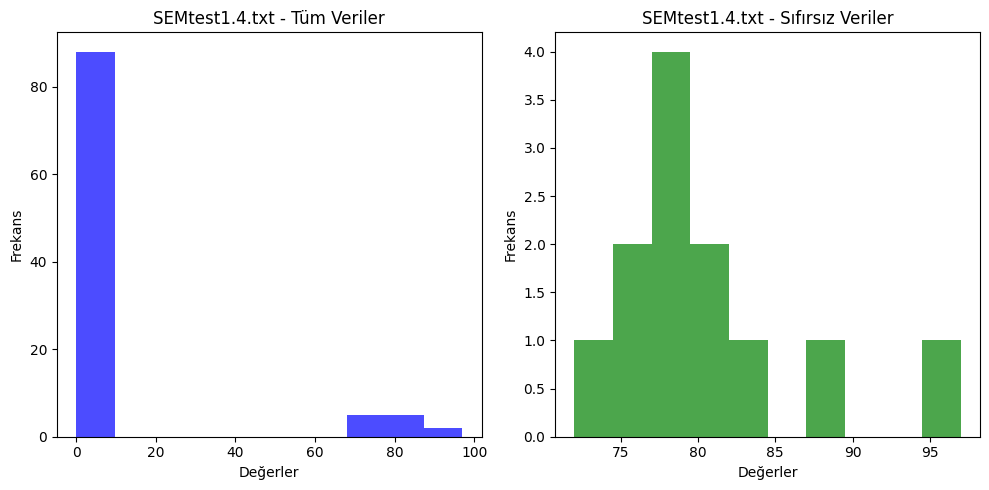

[0, 0, 0, 125, 0, 0, 0, 0, 0, 75, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 72, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 79, 0, 76, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 0, 0, 0, 0, 0, 0, 0, 88, 0, 0]
Ortalama: 7.05
sifirsiz Ortalama: 88.125
Standart Sapma: 24.43864767126036
sifirsiz Standart Sapma: 17.912547976209304


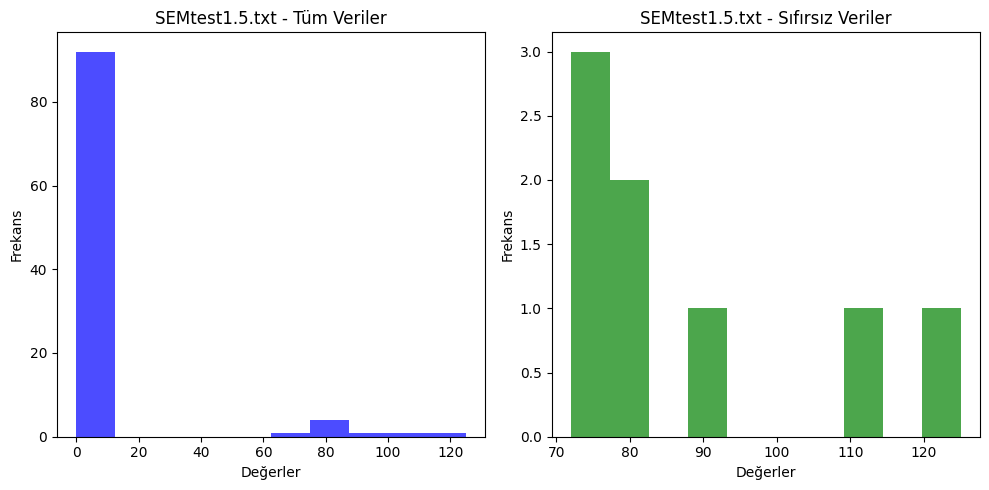

[0, 0, 0, 0, 0, 0, 0, 91, 0, 0, 0, 0, 0, 83, 0, 0, 0, 80, 0, 0, 0, 0, 0, 76, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 75, 0, 0, 0, 77, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 75, 0, 0, 0, 0, 97, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 77, 0, 0, 0, 0, 0]
Ortalama: 8.31
sifirsiz Ortalama: 83.1
Standart Sapma: 25.091311245130278
sifirsiz Standart Sapma: 8.98276126811795


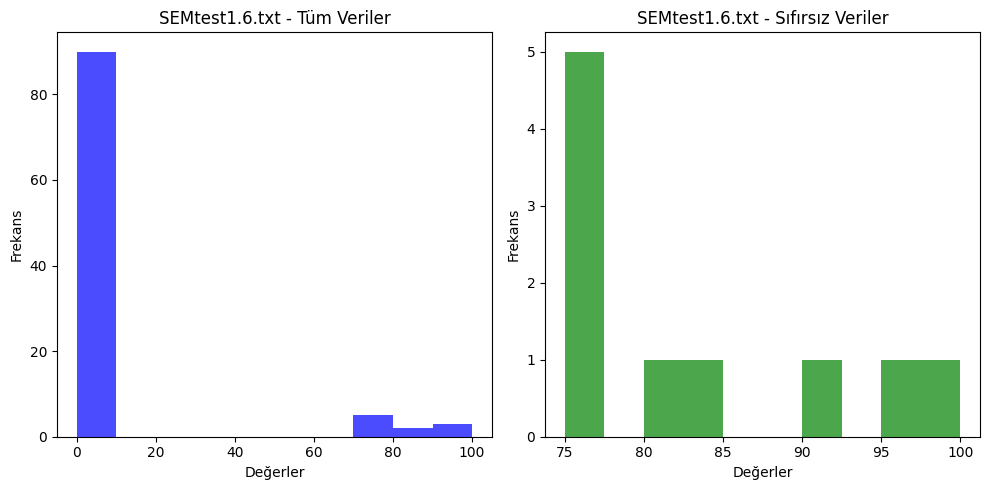

[0, 0, 0, 0, 0, 76, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 87, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 84, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 73, 0, 77, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 74, 0, 0, 76, 0, 0, 0, 0, 0]
Ortalama: 5.47
sifirsiz Ortalama: 78.14285714285714
Standart Sapma: 19.979717215216038
sifirsiz Standart Sapma: 4.882287854467161


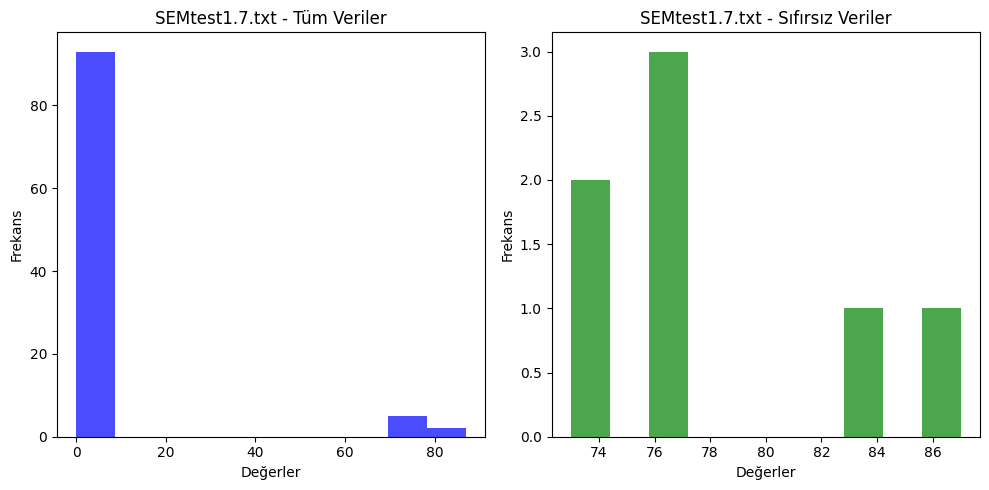

[0, 0, 77, 0, 0, 0, 0, 0, 0, 0, 0, 92, 0, 0, 0, 0, 0, 0, 0, 0, 77, 0, 0, 0, 0, 0, 0, 77, 72, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 74, 0, 0, 0, 0, 0, 0, 0, 0, 0, 99, 0, 79, 0, 0, 0, 82, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 90, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Ortalama: 8.19
sifirsiz Ortalama: 81.9
Standart Sapma: 24.712221672686553
sifirsiz Standart Sapma: 8.371977066380438


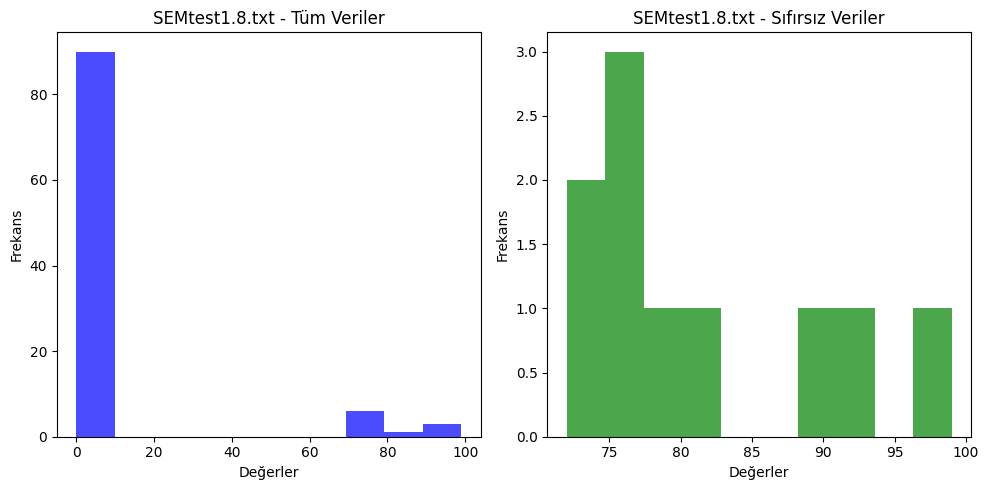

[0, 0, 0, 0, 0, 0, 79, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 71, 0, 0, 84, 0, 77, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 76, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 78, 0, 0, 0, 0, 0, 0, 82, 0, 73, 0, 0, 0, 0, 0, 73, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 90, 0]
Ortalama: 7.83
sifirsiz Ortalama: 78.3
Standart Sapma: 23.553791626827334
sifirsiz Standart Sapma: 5.478138369920935


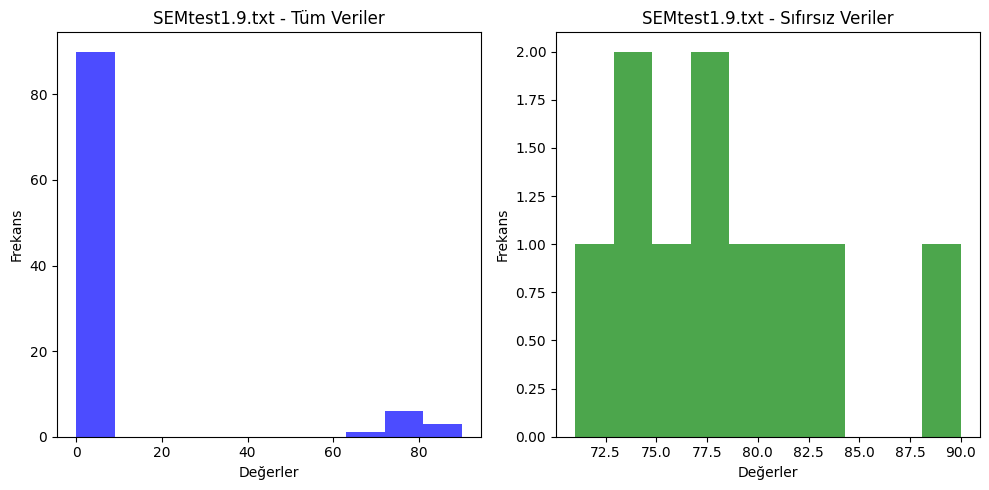

[0, 0, 0, 0, 119, 0, 74, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80, 0, 0, 0, 0, 0, 74, 0, 0, 0, 0, 0, 0, 0, 80, 0, 0, 78, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 91, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 83, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Ortalama: 7.59
sifirsiz Ortalama: 84.33333333333333
Standart Sapma: 24.455304128143627
sifirsiz Standart Sapma: 13.157169570660368


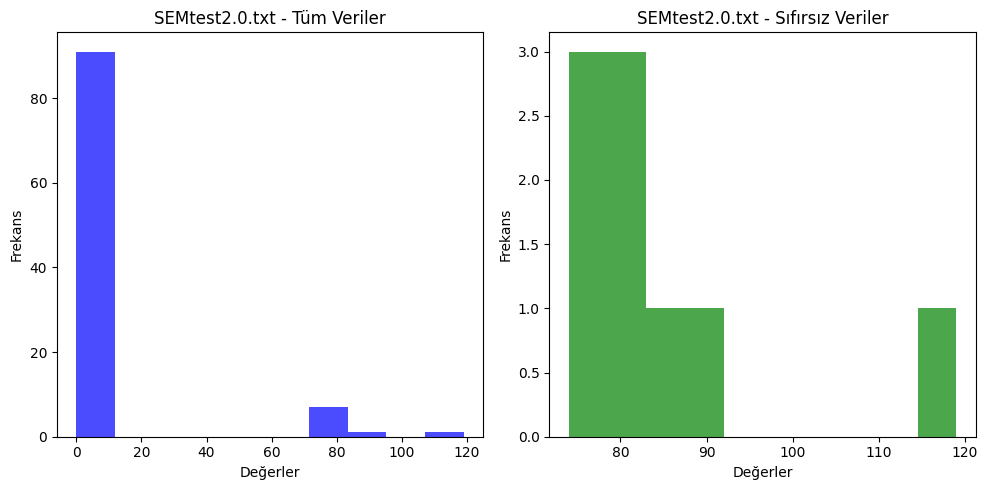

In [ ]:
import math
import matplotlib.pyplot as plt

# Ortalama hesaplama fonksiyonu
def calculate_mean(numbers):
    return sum(numbers) / len(numbers)

# Standart sapma hesaplama fonksiyonu
def calculate_standard_deviation(numbers):
    mean = calculate_mean(numbers)
    variance = sum((x - mean) ** 2 for x in numbers) / len(numbers)
    return math.sqrt(variance)

for i in range(21):
    if i<10:
        dosyapath = 'SEMtest0.' + str(i) +  '.txt'
    elif 20>i>=10:
        dosyapath = 'SEMtest1.' + str(i-10) + '.txt'
    elif i>=20:
        dosyapath = 'SEMtest2.' + str(i - 20) + '.txt'
    liste = []
    sifirsiz_liste = []
    with open(dosyapath, 'r') as dosya:
        lines = dosya.readlines()[2:-1]
    for satir in lines:
        if len(satir) >= 17:
            uc_karakter = satir[14:17]
            sayi_str = ''.join([c for c in uc_karakter if c.isdigit()])
            if sayi_str:
                sayi = int(sayi_str)
                liste.append(sayi)
            else:
                print(f"Satırda sayısal karakter yok: {satir}")

    print(liste)

    for i in liste:
        if i != 0:
            sifirsiz_liste.append(i)

    print(f"Ortalama: {calculate_mean(liste)}")
    print(f"sifirsiz Ortalama: {calculate_mean(sifirsiz_liste)}")

    print(f"Standart Sapma: {calculate_standard_deviation(liste)}")
    print(f"sifirsiz Standart Sapma: {calculate_standard_deviation(sifirsiz_liste)}")

# Histogram grafiğini oluşturma
    plt.figure(figsize=(10, 5))

    # Tüm veriler için histogram
    plt.subplot(1, 2, 1)
    plt.hist(liste, bins=10, color='blue', alpha=0.7)
    plt.title(f'{dosyapath} - Tüm Veriler')
    plt.xlabel('Değerler')
    plt.ylabel('Frekans')

    # Sıfırsız veriler için histogram
    plt.subplot(1, 2, 2)
    plt.hist(sifirsiz_liste, bins=10, color='green', alpha=0.7)
    plt.title(f'{dosyapath} - Sıfırsız Veriler')
    plt.xlabel('Değerler')
    plt.ylabel('Frekans')

    plt.tight_layout()
    plt.show()
